
📊 ANÁLISIS DE DUPLICADOS: ALUMNOS

📌 Total de filas: 13
📌 Total de columnas: 14

🔍 Duplicados exactos (filas idénticas): 0

🔑 Columnas clave para análisis: ['_id', 'id_alumno', 'curp', 'rfc']
✅ No hay duplicados en '_id'

❌ DUPLICADOS en 'id_alumno' (6 filas):


,id_alumno,_id,nombre_alumno,app,apm,id_carrera
7,220216,680727c65fe81803570f8f24,Alexis,Galindo,Serrano,67d7a402693e07166103f482
8,220216,680727e85fe81803570f8f25,Alexis,Galindo,Serrano,67d7a402693e07166103f482
9,220216,680728115fe81803570f8f26,Alexis,Galindo,Serrano,67d7a402693e07166103f482
10,220216,680728225fe81803570f8f27,Alexis,Galindo,Serrano,67d7a402693e07166103f482
11,220216,680728855fe81803570f8f28,Alexis,Galindo,Serrano,67d7a402693e07166103f482
12,220216,680728a55fe81803570f8f29,Alexis,Galindo,Serrano,67d7a402693e07166103f482


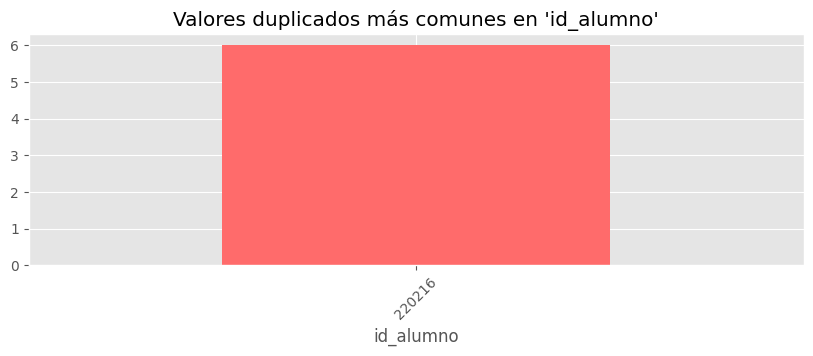

✅ No hay duplicados en 'curp'
✅ No hay duplicados en 'rfc'

⚠️ Inconsistencias detectadas en 1 id_alumno(s):


,_id,nombre_alumno,app,apm,id_carrera,id_grupo,id_alumno,curp,rfc,sexo,genero,estado_civil,updated_at,created_at
7,680727c65fe81803570f8f24,Alexis,Galindo,Serrano,67d7a402693e07166103f482,67d7a45f693e07166103f485,220216,MAGI990930MDFTMA5,MAGI990930,Femenino,Mujer,Soltera,2025-04-22 05:40:24.000,2025-04-22 05:40:24.000
8,680727e85fe81803570f8f25,Alexis,Galindo,Serrano,67d7a402693e07166103f482,67d7a45f693e07166103f485,220216,LODX000101MDFPZA6,LODX000101,Femenino,Mujer,Soltera,2025-04-22 05:40:25.000,2025-04-22 05:40:25.000
9,680728115fe81803570f8f26,Alexis,Galindo,Serrano,67d7a402693e07166103f482,67d7a45f693e07166103f485,220216,RAVD010202MDFMZA7,RAVD010202,Femenino,Mujer,Soltera,2025-04-22 05:40:26.000,2025-04-22 05:40:26.000
10,680728225fe81803570f8f27,Alexis,Galindo,Serrano,67d7a402693e07166103f482,67d7a45f693e07166103f485,220216,SACR020303MDFNSA8,SACR020303,Femenino,Mujer,Soltera,2025-04-22 05:40:27.000,2025-04-22 05:40:27.000
11,680728855fe81803570f8f28,Alexis,Galindo,Serrano,67d7a402693e07166103f482,67d7a45f693e07166103f485,220216,FLOT030404MDFRRA9,FLOT030404,Femenino,Mujer,Soltera,2025-04-22 05:40:28.000,2025-04-22 05:40:28.000
12,680728a55fe81803570f8f29,Alexis,Galindo,Serrano,67d7a402693e07166103f482,67d7a45f693e07166103f485,220216,TOML040505MDFRNA0,TOML040505,Femenino,Mujer,Soltera,2025-04-22 05:40:29.000,2025-04-22 05:40:29.000



📊 ANÁLISIS DE DUPLICADOS: CARRERAS

📌 Total de filas: 2
📌 Total de columnas: 4

🔍 Duplicados exactos (filas idénticas): 0

🔑 Columnas clave para análisis: ['_id']
✅ No hay duplicados en '_id'

📊 ANÁLISIS DE DUPLICADOS: GRUPOS

📌 Total de filas: 6
📌 Total de columnas: 5

🔍 Duplicados exactos (filas idénticas): 0

🔑 Columnas clave para análisis: ['_id']
✅ No hay duplicados en '_id'

📊 ANÁLISIS DE DUPLICADOS: ENCUESTAS

📌 Total de filas: 15
📌 Total de columnas: 39

🔍 Duplicados exactos (filas idénticas): 0

🔑 Columnas clave para análisis: ['_id', 'correo', 'id_alumno']
✅ No hay duplicados en '_id'

❌ DUPLICADOS en 'correo' (12 filas):


,correo,_id,id_grupo,id_carrera,programa_educativo,nombre
4,al222210636@gmail.com,67deee29c0040917a6047522,67d7a460693e07166103f486,67d7a402693e07166103f482,TICS,Ricardo
5,al222210636@gmail.com,67deef32c0040917a6047523,67d7a461693e07166103f487,67d7a402693e07166103f483,TICS,Daniel
7,al222210636@gmail.com,67e0eb8aff0a98cbb20b8de2,67d7a45f693e07166103f485,67d7a402693e07166103f482,TICS,Juan
0,example@mail.com,67de1a0aa71f355cd80b8a02,67d7a45f693e07166103f485,67d7a402693e07166103f482,Licenciatura en Software,Juan
2,example@mail.com,67de6a504499e9ed780ee1d2,67d7a45f693e07166103f485,67d7a402693e07166103f482,Licenciatura en Software,Daniel
3,example@mail.com,67deeae211bbf6cc9000eb42,67d7a45f693e07166103f485,67d7a402693e07166103f482,Licenciatura en Software,EMMA
1,nan,67de351ca71f355cd80b8a03,nan,nan,nan,nan
8,nan,67e0fc8fff0a98cbb20b8de4,nan,nan,nan,nan
9,nan,67eed48873d99b5d8a00db03,nan,nan,nan,nan
10,nan,67fa9331d2c1647a0f020cd3,nan,nan,nan,nan


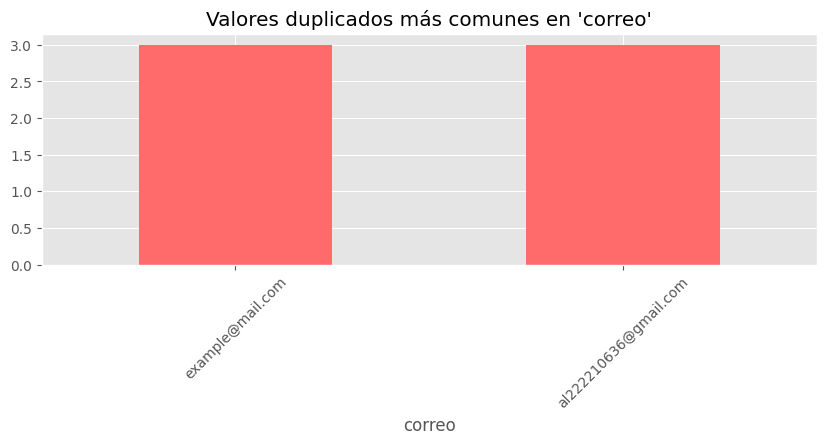


❌ DUPLICADOS en 'id_alumno' (9 filas):


,id_alumno,_id,correo,id_grupo,id_carrera,programa_educativo
0,nan,67de1a0aa71f355cd80b8a02,example@mail.com,67d7a45f693e07166103f485,67d7a402693e07166103f482,Licenciatura en Software
1,nan,67de351ca71f355cd80b8a03,nan,nan,nan,nan
2,nan,67de6a504499e9ed780ee1d2,example@mail.com,67d7a45f693e07166103f485,67d7a402693e07166103f482,Licenciatura en Software
3,nan,67deeae211bbf6cc9000eb42,example@mail.com,67d7a45f693e07166103f485,67d7a402693e07166103f482,Licenciatura en Software
4,nan,67deee29c0040917a6047522,al222210636@gmail.com,67d7a460693e07166103f486,67d7a402693e07166103f482,TICS
5,nan,67deef32c0040917a6047523,al222210636@gmail.com,67d7a461693e07166103f487,67d7a402693e07166103f483,TICS
6,nan,67e0dc087d783769a50a2402,al222210749@gmail.com,67d7a45f693e07166103f485,67d7a402693e07166103f482,TICS
13,nan,6807f0f1a7939fbe1d0433c2,22al221910361@gmail.com,67d7a461693e07166103f487,67d7a402693e07166103f482,Ing Software
14,nan,680854026e7da85f7a02dd62,estefaniicamacho@gmail.com,67d7a45f693e07166103f485,67d7a402693e07166103f483,Ing Software



❌ ERROR al procesar encuestas: index 0 is out of bounds for axis 0 with size 0

📊 ANÁLISIS DE DUPLICADOS: USERS

📌 Total de filas: 13
📌 Total de columnas: 9

🔍 Duplicados exactos (filas idénticas): 0

🔑 Columnas clave para análisis: ['_id', 'correo']
✅ No hay duplicados en '_id'
✅ No hay duplicados en 'correo'

📊 ANÁLISIS DE DUPLICADOS: ROLES

📌 Total de filas: 2
📌 Total de columnas: 4

🔍 Duplicados exactos (filas idénticas): 0

🔑 Columnas clave para análisis: ['_id']
✅ No hay duplicados en '_id'

📊 ANÁLISIS DE DUPLICADOS: MIGRATIONS

📌 Total de filas: 3
📌 Total de columnas: 3

🔍 Duplicados exactos (filas idénticas): 0

🔑 Columnas clave para análisis: ['_id']
✅ No hay duplicados en '_id'

📊 ANÁLISIS DE DUPLICADOS: PREDICCIONES

📌 Total de filas: 43
📌 Total de columnas: 4

🔍 Duplicados exactos (filas idénticas): 0

🔑 Columnas clave para análisis: ['_id', 'id_encuesta', 'id_alumno']
✅ No hay duplicados en '_id'

❌ DUPLICADOS en 'id_encuesta' (42 filas):


,id_encuesta,_id,riesgo,id_alumno
3,67de1a0aa71f355cd80b8a02,67e11594dfbff8739cc78797,Bajo,nan
32,67de1a0aa71f355cd80b8a02,67fa93323f4e0765466106a9,Bajo,nan
12,67de1a0aa71f355cd80b8a02,67eedd4c15e898042ed4f8c5,Bajo,nan
22,67de1a0aa71f355cd80b8a02,67fa90f1c2c0d0ce987bd64a,Bajo,nan
33,67de351ca71f355cd80b8a03,67fa93333f4e0765466106aa,Bajo,nan
13,67de351ca71f355cd80b8a03,67eedd4d15e898042ed4f8c6,Medio,nan
4,67de351ca71f355cd80b8a03,67e11595dfbff8739cc78798,Bajo,nan
23,67de351ca71f355cd80b8a03,67fa90f2c2c0d0ce987bd64b,Bajo,nan
24,67de6a504499e9ed780ee1d2,67fa90f2c2c0d0ce987bd64c,Medio,nan
34,67de6a504499e9ed780ee1d2,67fa93333f4e0765466106ab,Bajo,nan


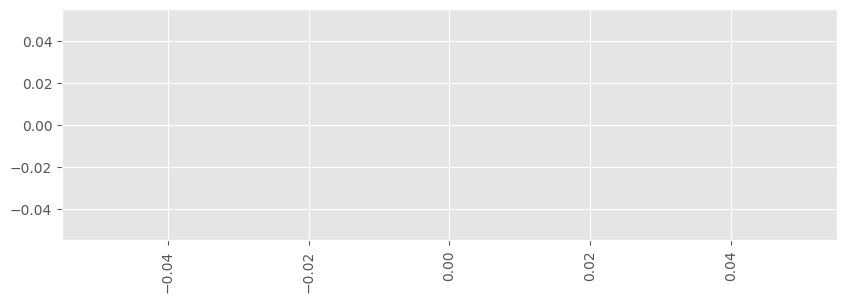

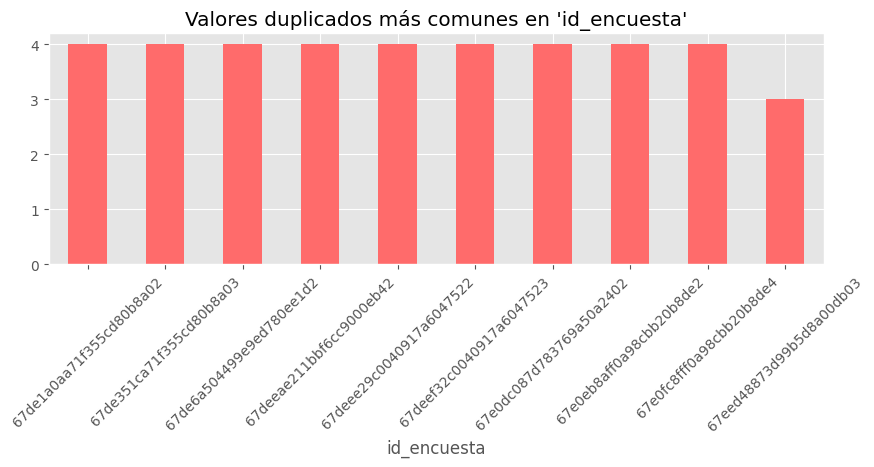


❌ DUPLICADOS en 'id_alumno' (42 filas):


,id_alumno,_id,riesgo,id_encuesta
10,222210636,67e11595dfbff8739cc7879e,Bajo,67e0eb8aff0a98cbb20b8de2
19,222210636,67eedd4e15e898042ed4f8cc,Bajo,67e0eb8aff0a98cbb20b8de2
29,222210636,67fa90f3c2c0d0ce987bd651,Bajo,67e0eb8aff0a98cbb20b8de2
39,222210636,67fa93333f4e0765466106b0,Bajo,67e0eb8aff0a98cbb20b8de2
11,67e0fc8eff0a98cbb20b8de3,67e11595dfbff8739cc7879f,Bajo,67e0fc8fff0a98cbb20b8de4
20,67e0fc8eff0a98cbb20b8de3,67eedd4e15e898042ed4f8cd,Bajo,67e0fc8fff0a98cbb20b8de4
30,67e0fc8eff0a98cbb20b8de3,67fa90f3c2c0d0ce987bd652,Bajo,67e0fc8fff0a98cbb20b8de4
40,67e0fc8eff0a98cbb20b8de3,67fa93333f4e0765466106b1,Bajo,67e0fc8fff0a98cbb20b8de4
21,67eed48873d99b5d8a00db02,67eedd4e15e898042ed4f8ce,Bajo,67eed48873d99b5d8a00db03
31,67eed48873d99b5d8a00db02,67fa90f3c2c0d0ce987bd653,Bajo,67eed48873d99b5d8a00db03


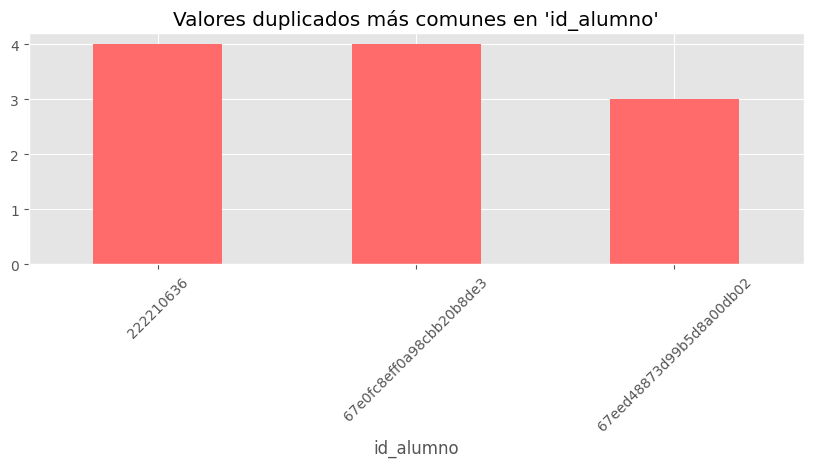


📈 RESUMEN EJECUTIVO


,archivo,total_filas,duplicados_exactos,duplicados_clave,%_duplicados_exactos,%_duplicados_clave
6,predicciones,43,0,84,0.000000,195.300000
0,alumnos,13,0,6,0.000000,46.200000
1,carreras,2,0,0,0.000000,0.000000
2,grupos,6,0,0,0.000000,0.000000
3,users,13,0,0,0.000000,0.000000
4,roles,2,0,0,0.000000,0.000000
5,migrations,3,0,0,0.000000,0.000000


<Figure size 1200x600 with 0 Axes>

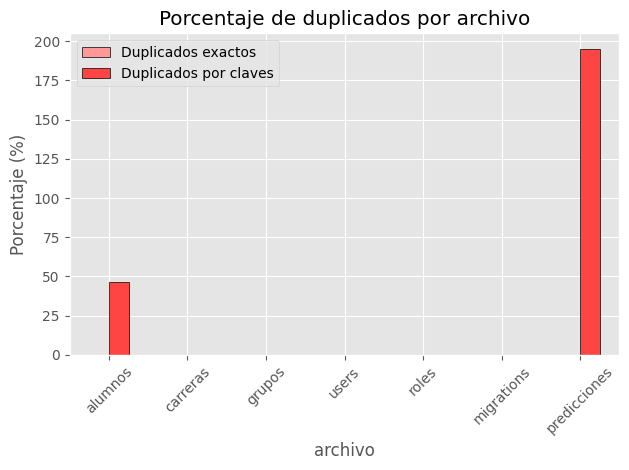

In [ ]:
# %% [markdown]
# # Detección Avanzada de Filas Duplicadas
# 
# ## Análisis de archivos CSV con múltiples criterios de duplicación

# %%
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

# Configuración de visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
plt.style.use('ggplot')

# Lista de archivos CSV
archivos = {
    'alumnos': 'csv/alumnos.csv',
    'carreras': 'csv/carreras.csv',
    'grupos': 'csv/grupos.csv',
    'encuestas': 'csv/encuestas.csv',
    'users': 'csv/users.csv',
    'roles': 'csv/roles.csv',
    'migrations': 'csv/migrations.csv',
    'predicciones': 'csv/predicciones.csv'
}

# %% [markdown]
# ## Función mejorada para análisis de duplicados

# %%
def analizar_duplicados(nombre_archivo, ruta_archivo):
    print(f"\n{'='*80}")
    print(f"📊 ANÁLISIS DE DUPLICADOS: {nombre_archivo.upper()}")
    print('='*80)
    
    try:
        # Leer archivo con manejo de errores
        df = pd.read_csv(ruta_archivo, on_bad_lines='warn')
        
        # Información básica
        print(f"\n📌 Total de filas: {len(df):,}")
        print(f"📌 Total de columnas: {len(df.columns)}")
        
        # 1. Duplicados exactos (todas las columnas)
        duplicados_exactos = df[df.duplicated(keep=False)]
        print(f"\n🔍 Duplicados exactos (filas idénticas): {len(duplicados_exactos)}")
        
        if not duplicados_exactos.empty:
            display(HTML(
                duplicados_exactos
                .style
                .set_properties(**{'background-color': '#fff7f7', 'border': '1px solid #ffcccc'})
                .set_table_attributes('style="width:100%;"')
                .to_html()
            ))
        
        # 2. Duplicados por columnas clave
        columnas_clave = {
            'alumnos': ['_id', 'id_alumno', 'curp', 'rfc'],
            'encuestas': ['_id', 'correo', 'id_alumno'],
            'users': ['_id', 'correo'],
            'predicciones': ['_id', 'id_encuesta', 'id_alumno'],
            'default': ['_id']
        }
        
        claves = columnas_clave.get(nombre_archivo, columnas_clave['default'])
        claves_disponibles = [c for c in claves if c in df.columns]
        
        print(f"\n🔑 Columnas clave para análisis: {claves_disponibles}")
        
        for col in claves_disponibles:
            dups = df[df.duplicated(subset=[col], keep=False)]
            if not dups.empty:
                print(f"\n❌ DUPLICADOS en '{col}' ({len(dups)} filas):")
                
                # Mostrar solo las primeras columnas para mejor visualización
                cols_to_show = [col] + [c for c in df.columns if c != col][:5]
                
                display(HTML(
                    dups[cols_to_show]
                    .sort_values(col)
                    .style
                    .set_properties(**{'background-color': '#fff0f0', 'border': '1px solid #ff9999'})
                    .set_table_attributes('style="width:100%;"')
                    .to_html()
                ))
                
                # Gráfico simple
                plt.figure(figsize=(10, 3))
                dup_counts = dups[col].value_counts().head(10)
                dup_counts.plot(kind='bar', color='#ff6b6b')
                plt.title(f"Valores duplicados más comunes en '{col}'")
                plt.xticks(rotation=45)
                plt.show()
            else:
                print(f"✅ No hay duplicados en '{col}'")
        
        # 3. Análisis específico por archivo
        if nombre_archivo == 'alumnos':
            # Verificar inconsistencias en id_alumno
            inconsistencias = df.groupby('id_alumno').nunique().max(axis=1) > 1
            if inconsistencias.any():
                ids_problematicos = inconsistencias[inconsistencias].index.tolist()
                print(f"\n⚠️ Inconsistencias detectadas en {len(ids_problematicos)} id_alumno(s):")
                
                for id_alum in ids_problematicos[:3]:  # Mostrar solo los primeros 3 para no saturar
                    display(HTML(
                        df[df['id_alumno'] == id_alum]
                        .style
                        .set_properties(**{'background-color': '#fff0f0'})
                        .to_html()
                    ))
        
        return {
            'archivo': nombre_archivo,
            'total_filas': len(df),
            'duplicados_exactos': len(duplicados_exactos),
            'duplicados_clave': sum(len(df[df.duplicated(subset=[col], keep=False)]) for col in claves_disponibles)
        }
    
    except Exception as e:
        print(f"\n❌ ERROR al procesar {nombre_archivo}: {str(e)}")
        return None

# %% [markdown]
# ## Ejecutar análisis completo

# %%
resultados = []
for nombre, ruta in archivos.items():
    res = analizar_duplicados(nombre, ruta)
    if res:
        resultados.append(res)

# %% [markdown]
# ## Resumen ejecutivo

# %%
if resultados:
    df_resumen = pd.DataFrame(resultados)
    df_resumen['%_duplicados_exactos'] = (df_resumen['duplicados_exactos'] / df_resumen['total_filas'] * 100).round(1)
    df_resumen['%_duplicados_clave'] = (df_resumen['duplicados_clave'] / df_resumen['total_filas'] * 100).round(1)
    
    print("\n" + "="*80)
    print("📈 RESUMEN EJECUTIVO")
    print("="*80)
    
    display(HTML(
        df_resumen
        .sort_values('duplicados_clave', ascending=False)
        .style
        .background_gradient(cmap='Reds', subset=['%_duplicados_exactos', '%_duplicados_clave'])
        .set_properties(**{'border': '1px solid #ddd'})
        .set_table_attributes('style="width:100%;"')
        .to_html()
    ))
    
    # Gráfico comparativo
    plt.figure(figsize=(12, 6))
    df_resumen.set_index('archivo')[['%_duplicados_exactos', '%_duplicados_clave']].plot(
        kind='bar', 
        color=['#ff9999', '#ff4444'],
        edgecolor='black'
    )
    plt.title('Porcentaje de duplicados por archivo')
    plt.ylabel('Porcentaje (%)')
    plt.xticks(rotation=45)
    plt.legend(['Duplicados exactos', 'Duplicados por claves'])
    plt.tight_layout()
    plt.show()